In [13]:
from zlib import crc32

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
from itertools import combinations
import matplotlib.pyplot as plt

from  statsmodels.stats.weightstats import ttest_ind

from statsmodels.stats.multitest import multipletests

In [2]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    size = rs.randint(low=5, high=10)
    data = rs.randn(30, size)
    for i in range(size):
        data[:, i] += rs.uniform()*2-1.0
    return data

In [3]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

# yurchenko.aa@phystech.edu

Enter your mail: yurchenko.aa@phystech.edu


In [4]:
data = task['data']

In [5]:
# new_data = [data[:, i] for i in range(data.shape[1])] # представляем данные в более удобной форме для дальнейшей обработки
new_data = data.T

In [6]:
def test(data):
    rejections, p_values = 0, []
    for x, y in combinations(data, 2):
        p_value = st.ttest_ind(x, y)[1]
        p_values.append(p_value)
        rejections += p_value <= 0.05
    return rejections, p_values

$\textbf{Для какого количества пар из столбцов отвергается гипотеза о совпадении среднего?}$

In [7]:
print('Rejections =', test(new_data)[0])

Rejections = 4


$\textbf{Значение уровня значимости при использовании поправки Бонферрони $(\alpha=0.05)$}$


In [8]:
print('P_value_with_Bonferroni = {:.3f}'.format(multipletests(test(new_data)[1], method='bonferroni')[-1])) 

P_value_with_Bonferroni = 0.005


$\textbf{Для какого количества пар из столбцов отвергается гипотеза о совпадении среднего при использовании поправки Бонферрони?}$

In [9]:
print('Rejections_with_Bonferroni =', multipletests(test(new_data)[1], method='bonferroni')[0].sum())

Rejections_with_Bonferroni = 2


$\textbf{Для какого количества пар из столбцов отвергается гипотеза о совпадении среднего при использовании метода Холма?}$

In [10]:
print('Rejections_with_Holm =', multipletests(test(new_data)[1], method='holm')[0].sum())

Rejections_with_Holm = 2


$\textbf{Оценка $m_0$ по методу Шведера-Спьётволла $(\lambda = 0.5)$}$

In [11]:
lambd = 0.5
print('m0 = {:.3f}'.format((sum([1 for x in test(new_data)[1] if x > lambd]) + 1) / (1 - lambd)))

m0 = 4.000


$\textbf{Не относится к заданию}$

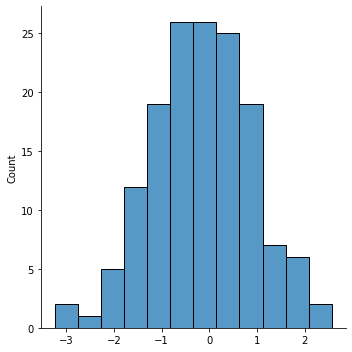

In [15]:
_ = sns.displot(data.flatten())

In [30]:
l = 0
p_values = []
for x in data:
  p_value = st.shapiro(x)[1]
  p_values.append(p_value)
  l += (p_value < 0.05)
l, p_values   

(3,
 [0.712541401386261,
  0.030772870406508446,
  0.6363730430603027,
  0.7414813041687012,
  0.790755569934845,
  0.4053451120853424,
  0.6840804815292358,
  0.15315952897071838,
  0.1770087480545044,
  0.4368809461593628,
  0.9831113815307617,
  0.2906413972377777,
  0.6347814202308655,
  0.6642791628837585,
  0.45610031485557556,
  0.5485439300537109,
  0.6284328103065491,
  0.4472523331642151,
  0.006170458626002073,
  0.786097526550293,
  0.10955099016427994,
  0.9862751364707947,
  0.6434678435325623,
  0.0218658410012722,
  0.7751399278640747,
  0.9736829400062561,
  0.10242880135774612,
  0.6313533782958984,
  0.7837767601013184,
  0.2936835289001465])